<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` С помощью seed задаётся начальное значение псевдослучайной последовательности. Так как формула генерации псевдослучайных чисел рекурентна, то при различных запусках модели, результат будет отличаться только из-за изменения самой модели, а не из-за изменения псведослучайной последовательности.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [87]:
import pandas as pd

In [88]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [ ]:
# random_rows = df_train.sample(30)
# print(random_rows)
# print(df_test.head())
# print(df_test.tail())
# print(df_test.isna().sum())
print(df_train.isna().sum())
# print(df_test.columns[df_test.isna().any()])
# print(df_test.duplicated().sum())
'''
По случайным верхним/нижним строкам можно сделать вывод о типах признаков, количестве объектов, оценить примерные масштабы данных,
нельзя сделать вывод о дубликатах, пропусках, трендах, невозможно качественно проанализировать dataset.
По duplicated() нельзя сделать качественный вывод о дубликатах в виду того, что он не показывает оригиналы дубликатов (сложно оценить контекст),
не показывает частоту дублирования, невозможно оценить причинность дублирования данных, соотвественно сложно спрогнозировать влияние на модель.
'''



name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64


'\nПо случайным верхним/нижним строкам можно сделать вывод о типах признаков, количестве объектов, оценить примерные масштабы данных,\nнельзя сделать вывод о дубликатах, пропусках, трендах, невозможно качественно проанализировать dataset.\nПо duplicated() нельзя сделать качественный вывод о дубликатах в виду того, что он не показывает оригиналы дубликатов (сложно оценить контекст),\nне показывает частоту дублирования, невозможно оценить причинность дублирования данных, соотвественно сложно спрогнозировать влияние на модель.\n'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from ydata_profiling import ProfileReport
# profile = profile_report = ProfileReport(df_train, title='ydata-profiling')
# profile.to_file("output.html")

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
from sklearn import impute

In [ ]:
print(df_train.isna().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64


In [ ]:
df_test.shape

(1000, 13)

In [ ]:
cat_features_mask = (df_train.dtypes == "object").values
df_test_real = df_test[df_test.columns[~cat_features_mask]]
df_train_real = df_train[df_train.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="mean")
mis_replacer.fit(df_train_real)
df_test_no_mis_real = pd.DataFrame(data=mis_replacer.transform(df_test_real), columns=df_test_real.columns)
df_train_no_mis_real = pd.DataFrame(data=mis_replacer.transform(df_train_real), columns=df_train_real.columns)
df_test_cat = df_test[df_test.columns[cat_features_mask]]
df_train_cat = df_train[df_train.columns[cat_features_mask]]
df_test_no_miss = pd.concat([df_test_no_mis_real, df_test_cat], axis=1)
df_train_no_miss = pd.concat([df_train_no_mis_real, df_train_cat], axis=1)
print(df_train_no_miss.isna().sum())
df_train = df_train_no_miss
df_test = df_test_no_miss
df_test.shape

year               0
selling_price      0
km_driven          0
seats              0
name               0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
dtype: int64


(1000, 13)

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
y = df_train['selling_price']
y_test = df_test['selling_price']
df_train = df_train.drop('selling_price', axis=1)
df_test = df_test.drop('selling_price', axis=1)
print(df_train.shape, len(y))
print(df_train.duplicated().sum())
dup_mask = df_train.duplicated()
df_dup = df_train[dup_mask]
print(df_dup)
df_train_no_dup = df_train.drop_duplicates(keep="first")
indices = df_train_no_dup.index
y_no_dup = y.loc[indices]
df_train_no_dup = df_train_no_dup.reset_index(drop=True)
y_no_dup = y_no_dup.reset_index(drop=True)
print(df_train_no_dup.shape)
print(y_no_dup.shape)

(6999, 12) 6999
1159
        year  km_driven  seats                                      name  \
254   2017.0    35000.0    5.0                  Hyundai Grand i10 Sportz   
258   2012.0    50000.0    5.0                          Maruti Swift VXI   
268   2014.0    70000.0    5.0                    Maruti Swift Dzire VXI   
324   2017.0     9000.0    5.0  Jaguar XE 2016-2019 2.0L Diesel Prestige   
325   2019.0    20000.0    5.0                             Lexus ES 300h   
...      ...        ...    ...                                       ...   
6947  2010.0    60000.0    5.0                    Chevrolet Spark 1.0 LS   
6984  2018.0    24000.0    5.0  Ford Freestyle Titanium Plus Diesel BSIV   
6989  2015.0    50000.0    5.0                    Maruti Swift Dzire VDI   
6997  2013.0    25000.0    5.0                           Tata Indigo CR4   
6998  2013.0    25000.0    5.0                           Tata Indigo CR4   

        fuel seller_type transmission         owner     mileage   

In [ ]:
y_df = y_no_dup.to_frame()
df_train = pd.concat([df_train_no_dup, y_df], axis=1)
df_test = pd.concat([df_test, y_test], axis=1)
print(df_train.shape)
print(df_test.shape)


(5840, 13)
(1000, 13)


In [ ]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
print(df_train.head)

<bound method NDFrame.head of         year  km_driven  seats                               name    fuel  \
0     2014.0   145500.0    5.0             Maruti Swift Dzire VDI  Diesel   
1     2014.0   120000.0    5.0       Skoda Rapid 1.5 TDI Ambition  Diesel   
2     2010.0   127000.0    5.0          Hyundai i20 Sportz Diesel  Diesel   
3     2007.0   120000.0    5.0             Maruti Swift VXI BSIII  Petrol   
4     2017.0    45000.0    5.0      Hyundai Xcent 1.2 VTVT E Plus  Petrol   
...      ...        ...    ...                                ...     ...   
5835  2008.0   191000.0    5.0            Hyundai Santro Xing GLS  Petrol   
5836  2013.0    50000.0    5.0  Maruti Wagon R VXI BS IV with ABS  Petrol   
5837  2013.0   110000.0    5.0                  Hyundai i20 Magna  Petrol   
5838  2007.0   119000.0    5.0              Hyundai Verna CRDi SX  Diesel   
5839  2009.0   120000.0    5.0             Maruti Swift Dzire ZDi  Diesel   

     seller_type transmission                

In [ ]:
df_test['mileage'] = df_test['mileage'].str.replace(' kmpl', '', regex=False)
df_test['mileage'] = df_test['mileage'].str.replace(' km/kg', '', regex=False)
df_test['engine'] = df_test['engine'].str.replace(' CC', '', regex=False)
df_test['max_power'] = df_test['max_power'].str.replace(' bhp', '', regex=False)
df_test[['mileage', 'engine', 'max_power']] = df_test[['mileage', 'engine', 'max_power']].apply(pd.to_numeric, downcast='float')
print(df_test['mileage'].dtype)
print(df_test['engine'].dtype)
print(df_test['max_power'].dtype)
df_test = df_test.drop('torque', axis=1)

float32
float32
float32


In [ ]:
# your code here
df_train['mileage'] = df_train['mileage'].str.replace(' kmpl', '', regex=False)
df_train['mileage'] = df_train['mileage'].str.replace(' km/kg', '', regex=False)
df_train['engine'] = df_train['engine'].str.replace(' CC', '', regex=False)
df_train['max_power'] = df_train['max_power'].str.replace(' bhp', '', regex=False)
df_train[['mileage', 'engine', 'max_power']] = df_train[['mileage', 'engine', 'max_power']].apply(pd.to_numeric, downcast='float')
print(df_train['mileage'].dtype)
print(df_train['engine'].dtype)
print(df_train['max_power'].dtype)
df_train = df_train.drop('torque', axis=1)

float32
float32
float32


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
# your code here
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].apply(pd.to_numeric, downcast='integer')


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
df_train.describe()
#df_test.describe()
# df_train.describe(include=['object', 'category'])
# df_test.describe(include=['object', 'category'])

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,5840.000000,5.840000e+03,5840.000000,5654.000000,5654.000000,5656.000000,5.840000e+03
mean,2013.428425,7.395224e+04,5.440057,19.432842,1435.418091,88.103065,5.229601e+05
std,4.095622,6.007114e+04,0.979297,4.051002,492.453278,32.131943,5.354320e+05
min,1983.000000,1.000000e+00,2.000000,0.000000,624.000000,0.000000,2.999900e+04
25%,2011.000000,3.900000e+04,5.000000,16.799999,1197.000000,68.000000,2.500000e+05
50%,2014.000000,7.000000e+04,5.000000,19.369999,1248.000000,81.860001,4.050000e+05
75%,2017.000000,1.000000e+05,5.000000,22.320000,1498.000000,100.000000,6.400000e+05
max,2020.000000,2.360457e+06,14.000000,42.000000,3604.000000,400.000000,1.000000e+07


про числовые признаки: есть нулевые значения max_power, что наводит на мысль об ошибках в данных,
средний год выпуска 2013-2014
про категориальные: по fuel, seller_type, transmission, owner самая частая категория различна в train и test, 

In [ ]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

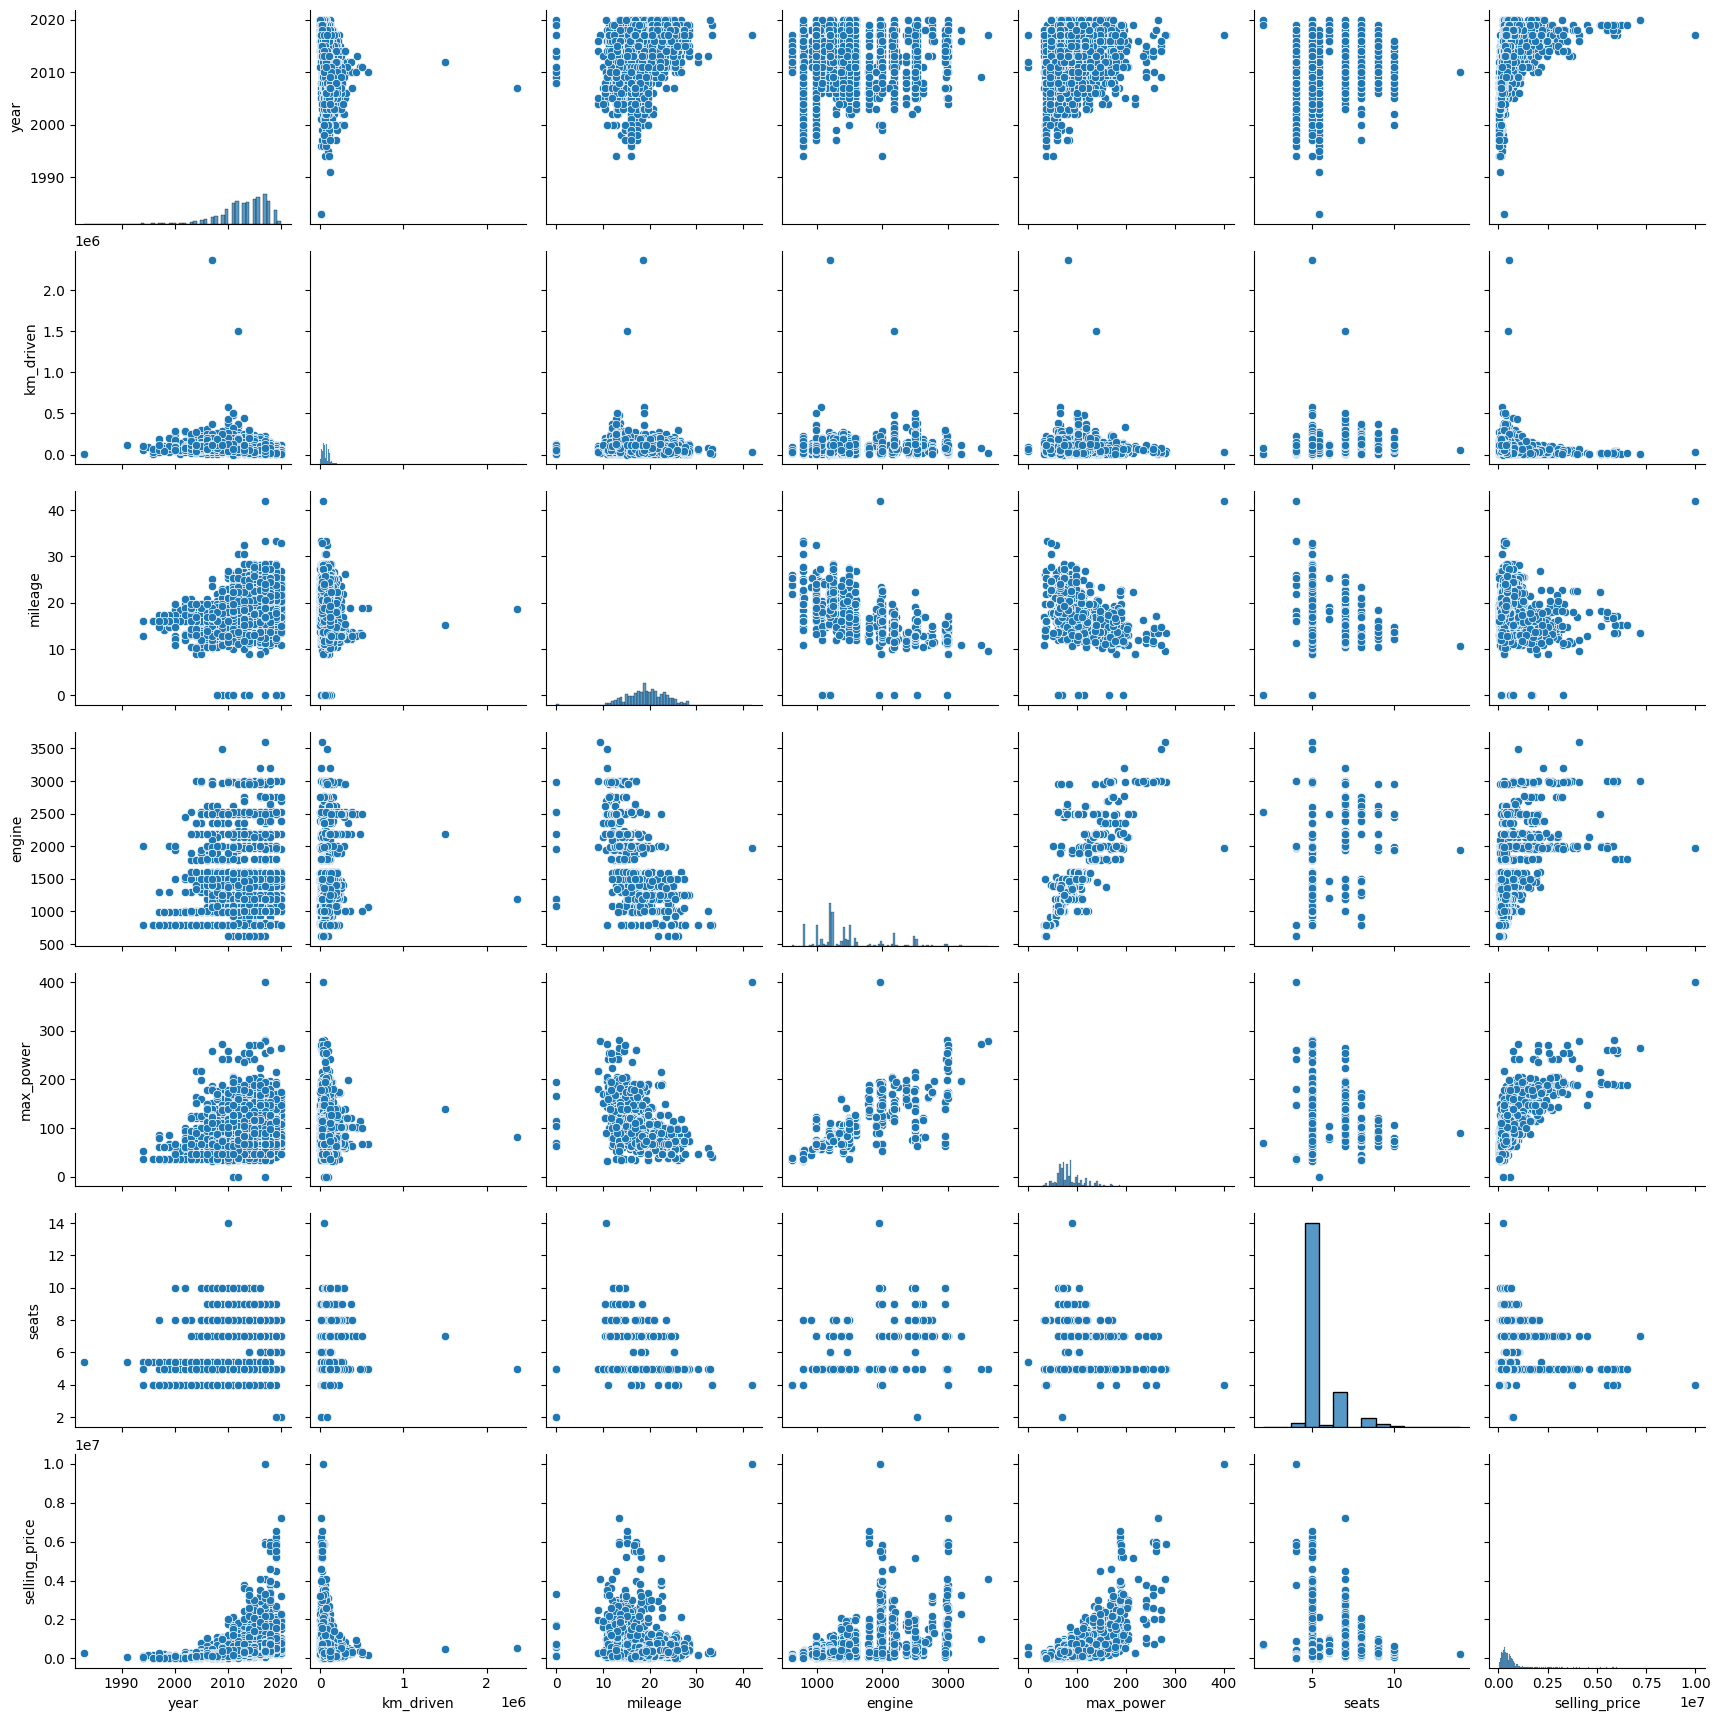

In [ ]:
numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
sns.pairplot(df_train[numerical_features])

Да, можно предположить связь с целевой переменной. Например, selling_price растёт вместе с year, причем зависимость нелинейная. selling_price так же нелинейно уменьшается с увеличением km_driven.Можно предположить, что selling_price окололинейно зависит от max_power. Так же при росте engine целевая переменная растёт до значения 2000, после чего остаётся на примерно этом же уровне. Наибольшие значение selling_price достигаются при значениях mileage ~[10:20], после чего уменьшается. Так же selling_price уменьшается с увеличением признака seats.
Можно предположить корреляции, например, между engine и max_power. Так же с ростом engine уменьшается mileage.

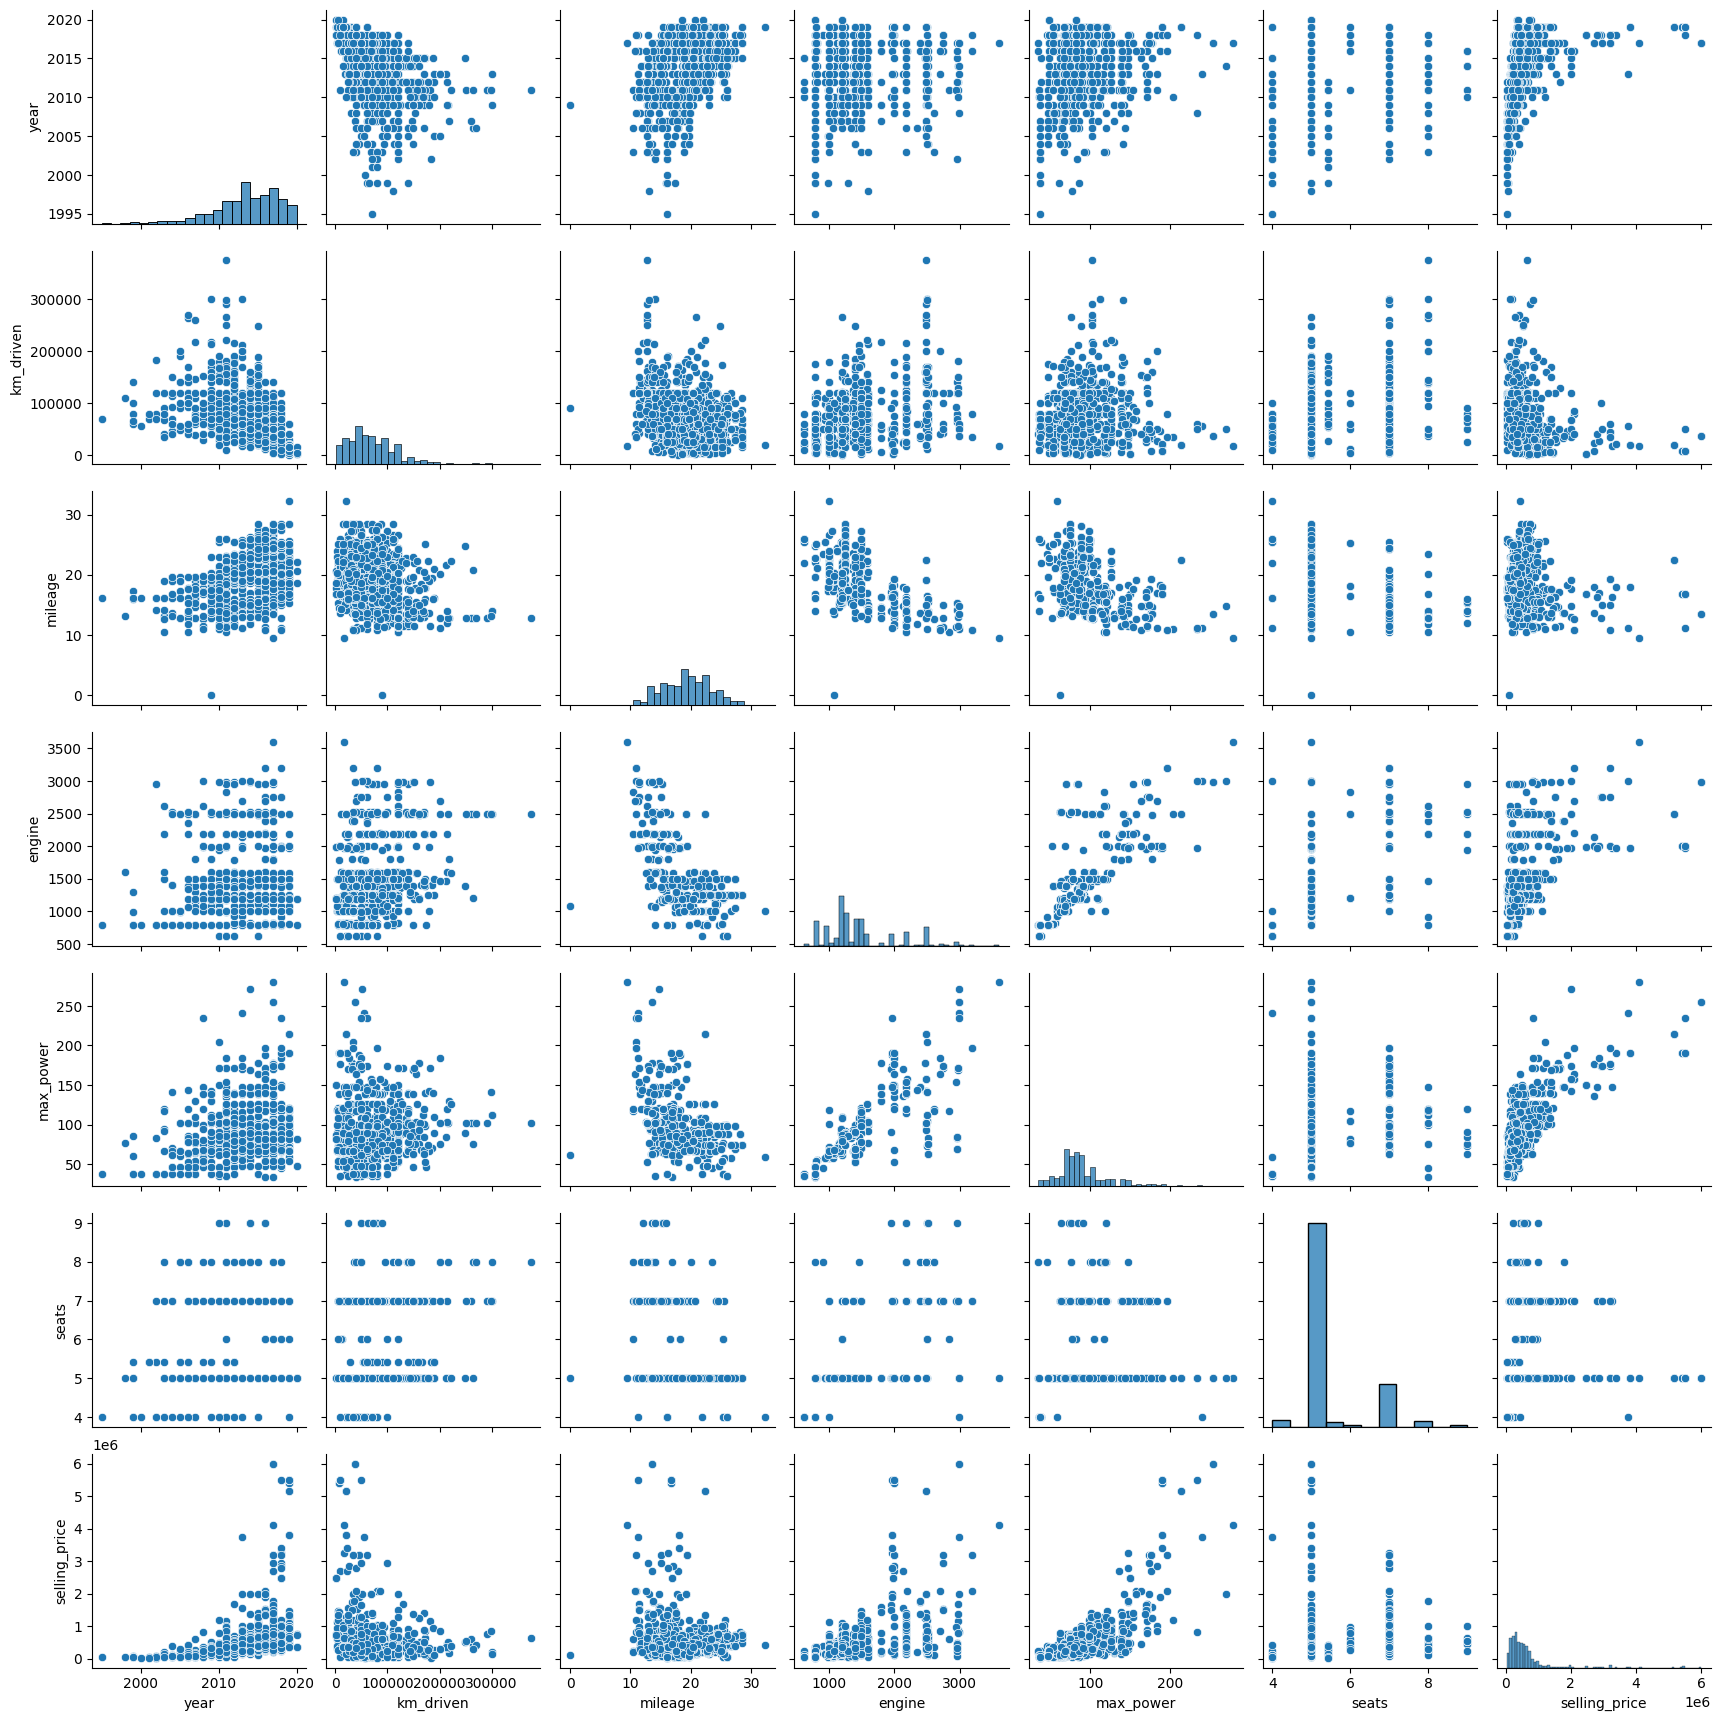

In [ ]:
sns.pairplot(df_test[numerical_features])

В целом, завимости похожие. Есть небольшие различие, так как, например, в test распределение selling_price от km_driven имеет гораздо большую плотность значений при росте km_driven.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

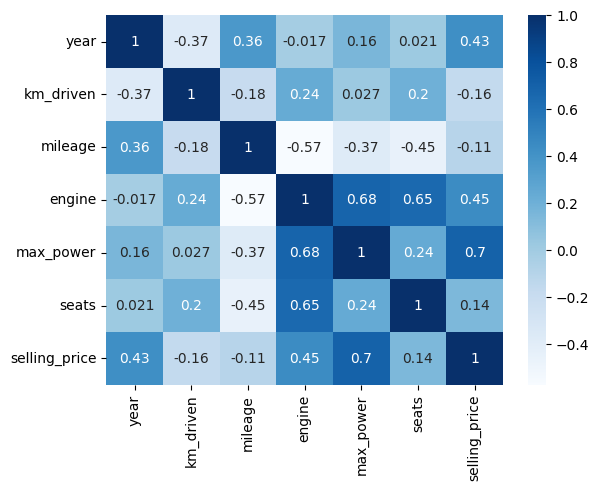

In [ ]:
sns.heatmap(df_train[numerical_features].corr(), cmap="Blues", annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее скоррелированы между собой km_driven, max_power и year,seats.

Сильная положительная зависимость между max_power, selling price; engine, max_power; seats, engine.Зависимости слабее: selling_price, year; engine, selling_price; km_driven, year.

В целом утверждение имеет смысл, эта корреляция =-0,37. Однако, надо понимать, что корреляция имеет умеренное значение, поэтому следует брать во внимание, что есть большое количество исключений этой зависимости.


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

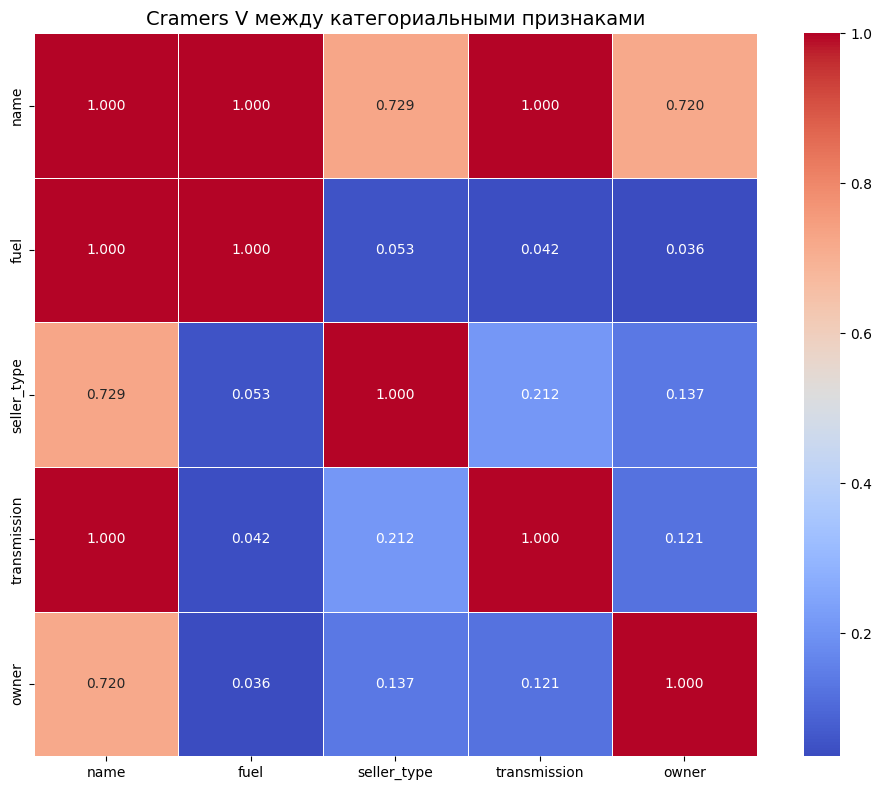

In [ ]:
#нарисуем корреляции категориальных признаков через V-меру Крамера.
import association_metrics as am
df_cat = df_train.apply(lambda x: x.astype("category") if x.dtype == "object" else x)
cramersv = am.CramersV(df_cat)
cramersv_matrix = cramersv.fit()
plt.figure(figsize=(10, 8))
sns.heatmap(cramersv_matrix, annot=True, cmap='coolwarm', 
            fmt='.3f', linewidths=0.5, square=True)
plt.title('Cramers V между категориальными признаками', fontsize=14)
plt.tight_layout()
plt.show()

interval columns not set, guessing: ['year', 'km_driven', 'seats', 'mileage', 'engine', 'max_power', 'selling_price']


<Axes: >

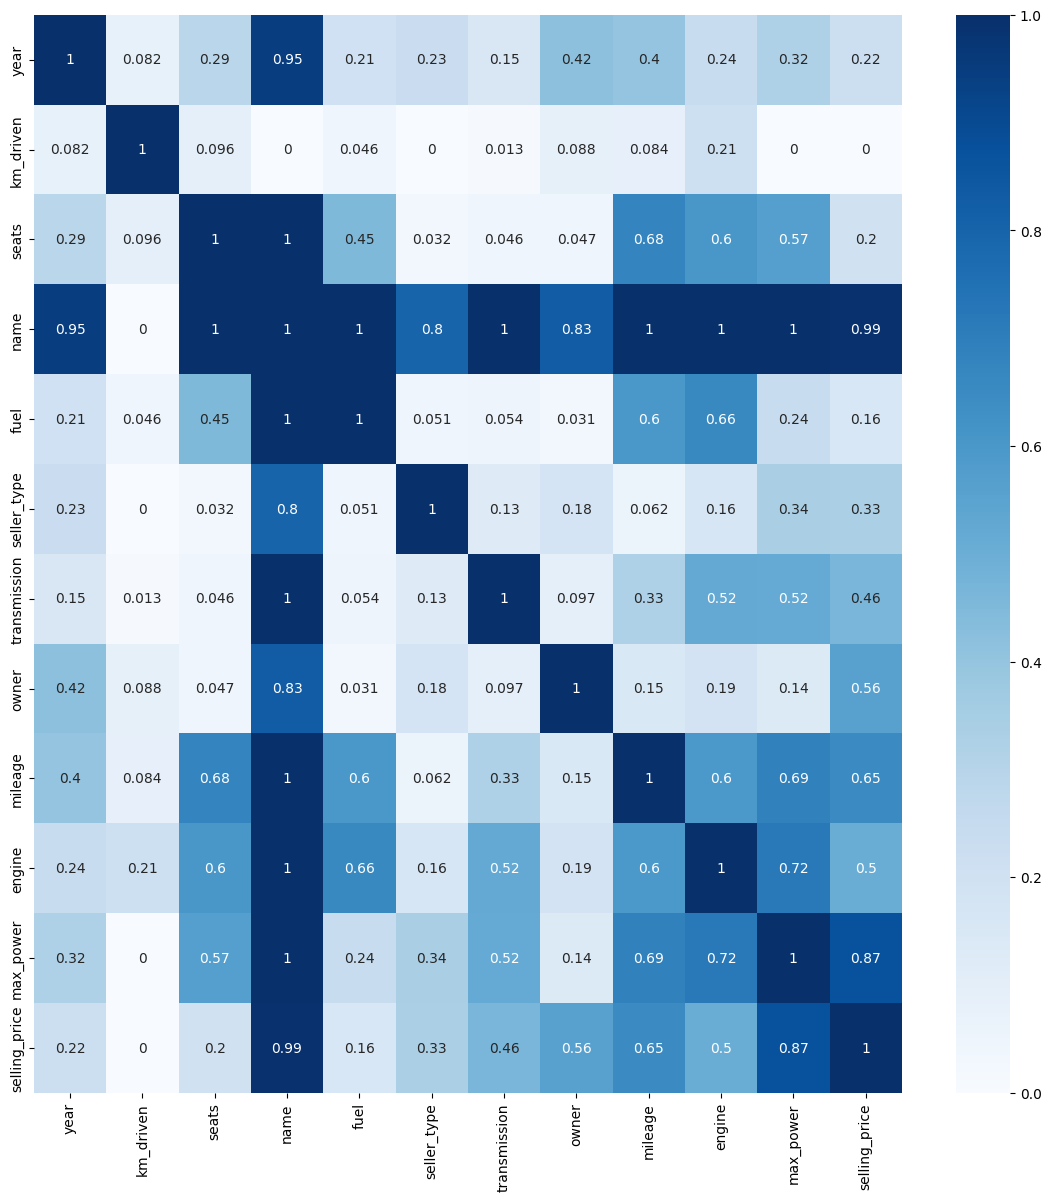

In [ ]:
#нарисуем корреляции всех признаков через phik
import phik
plt.figure(figsize=(14,14))
ph = df_train.phik_matrix()
sns.heatmap(ph, cmap="Blues", annot=True)

Почему необходимо находить корреляции между всеми признаками (числовые-категориальные): так как можно проследить важные закономерности, например, на последней визуализации phik видна сильная корреляция между engine и fuel(=0.66). Эту корреляцию не получить по корреляции Пирсона.

Точно та же логика при корреляции признаков категориальный-категориальный.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [ ]:
print(df_test.shape)
df_train.info()

(1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5840 non-null   float64
 1   km_driven      5840 non-null   float64
 2   seats          5840 non-null   float64
 3   name           5840 non-null   object 
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float32
 9   engine         5654 non-null   float32
 10  max_power      5656 non-null   float32
 11  selling_price  5840 non-null   float64
dtypes: float32(3), float64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
y_train = df_train['selling_price'].copy()
X_train = df_train.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).drop(columns=['selling_price']).copy()
print(X_train)

        year  km_driven  seats    mileage  engine   max_power
0     2014.0   145500.0    5.0  23.400000  1248.0   74.000000
1     2014.0   120000.0    5.0  21.139999  1498.0  103.519997
2     2010.0   127000.0    5.0  23.000000  1396.0   90.000000
3     2007.0   120000.0    5.0  16.100000  1298.0   88.199997
4     2017.0    45000.0    5.0  20.139999  1197.0   81.860001
...      ...        ...    ...        ...     ...         ...
5835  2008.0   191000.0    5.0  17.920000  1086.0   62.099998
5836  2013.0    50000.0    5.0  18.900000   998.0   67.099998
5837  2013.0   110000.0    5.0  18.500000  1197.0   82.849998
5838  2007.0   119000.0    5.0  16.799999  1493.0  110.000000
5839  2009.0   120000.0    5.0  19.299999  1248.0   73.900002

[5840 rows x 6 columns]


In [ ]:
# year - год выпуска, может иметь тренд обратной зависимости с целевой переменной
# km_driven - пробег, показатель износа, поэтому так же может иметь тренд с целевой переменной
# mileage - расход топлива, в каком-то смысле может определять ресурсозатратность автомобиля
# engine - мощность двигателя, может определять класс автомобиля
# max_power - максимальная мощность, показатель производительности
# seats - количество мест, может определять тип автомобиля

In [ ]:
y_test = df_test['selling_price'].copy()
X_test = df_test.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).drop(columns=['selling_price']).copy()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       5840 non-null   float64
 1   km_driven  5840 non-null   float64
 2   seats      5840 non-null   float64
 3   mileage    5654 non-null   float32
 4   engine     5654 non-null   float32
 5   max_power  5656 non-null   float32
dtypes: float32(3), float64(3)
memory usage: 205.4 KB


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

Поясню повторное заполнение пропусков. Дело в том, что по заданию надо бы сначала выполнить...

In [ ]:
print(df_test.shape)

(1000, 12)


In [ ]:
cat_features_mask = (X_train.dtypes == "object").values
X_test_real = X_test[X_test.columns[~cat_features_mask]]
X_train_real = X_train[X_train.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="mean")
mis_replacer.fit(X_train_real)
X_test_no_mis_real = pd.DataFrame(data=mis_replacer.transform(X_test_real), columns=X_test_real.columns)
X_train_no_mis_real = pd.DataFrame(data=mis_replacer.transform(X_train_real), columns=X_train_real.columns)
X_test_cat = X_test[X_test.columns[cat_features_mask]].fillna("NA")
X_train_cat = X_train[X_train.columns[cat_features_mask]].fillna("NA")
X_test_no_miss = pd.concat([X_test_no_mis_real, X_test_cat], axis=1)
X_train_no_miss = pd.concat([X_train_no_mis_real, X_train_cat], axis=1)
print(X_train_no_miss.isna().sum())
print(X_train_no_miss.shape)
X_train = X_train_no_miss
X_test = X_test_no_miss

year         0
km_driven    0
seats        0
mileage      0
engine       0
max_power    0
dtype: int64
(5840, 6)


In [ ]:
X_test.isna().sum()

year         0
km_driven    0
seats        0
mileage      0
engine       0
max_power    0
dtype: int64

In [ ]:
#print(X_train.isna().sum())
print(X_train.isna().sum())

year         0
km_driven    0
seats        0
mileage      0
engine       0
max_power    0
dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
model = LinearRegression()
model.fit(X_train, y_train)
pred_linear_regr = model.predict(X_test)
mse = MSE(y_test, pred_linear_regr)
R2 = r2_score(y_test, pred_linear_regr)
print(f'mse = {mse}\nr2_score = {R2}')
# your code here

mse = 233433308601.6029
r2_score = 0.5939079464444217


In [ ]:
По R2 можно сделать вывод об умеренном качестве модели, то есть модель объясняет около 59% дисперсии данных.

MSE имеет крайне большое значение, что наводит на то, что вероятно необходимо масштабирование.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
# your code here

В данных после стандартизации появились NaN. Я думаю, это произошло в виду того, что присуствовали нулевые значения после стандартизации standartScaler. Это может произойти, если std==0. Поэтому появилась потребность снова заменить пропуски в данных на mean.

In [ ]:
cat_features_mask = (X_train_scaled.dtypes == "object").values
X_train_scaled_real = X_train_scaled[X_train_scaled.columns[~cat_features_mask]]
X_test_scaled_real = X_test_scaled[X_test_scaled.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="mean")
X_train_scaled_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_train_scaled_real), columns=X_train_scaled_real.columns)
X_test_scaled_no_mis_real = pd.DataFrame(data=mis_replacer.transform(X_test_scaled_real), columns=X_test_scaled_real.columns)
X_train_scaled_no_mis_real.isna().sum()
X_train_scaled = X_train_scaled_no_mis_real
X_test_scaled = X_test_scaled_no_mis_real

In [92]:
X_test_scaled.to_csv('test_data.csv', index=False)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
model = LinearRegression()
model.fit(X_train_scaled, y_train)
pred_scaled = model.predict(X_test_scaled)
mse = MSE(y_test, pred_scaled)
R2 = r2_score(y_test, pred_scaled)
print(f'mse = {mse}\nr2_score = {R2}')

mse = 233433308601.5939
r2_score = 0.5939079464444372


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model.coef_,
})
print(coefficients)

     feature    coefficient
0       year  157828.340051
1  km_driven  -43394.332380
2      seats  -24015.134454
3    mileage   26763.602823
4     engine   61976.710158
5  max_power  320823.529029


Из значений можно сделать вывод о том, что max_power наиболее значимый.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso
model_l1 = Lasso()
model_l1.fit(X_train_scaled, y_train)
pred_l1 = model_l1.predict(X_test_scaled)
print(MSE(y_test, pred_l1))
print(r2_score(y_test, pred_l1))
# your code here

233433974103.41824
0.5939067887047638


In [ ]:
coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model_l1.coef_,
})
print(coefficients)

     feature    coefficient
0       year  157828.076528
1  km_driven  -43393.237563
2      seats  -24012.343867
3    mileage   26761.829840
4     engine   61972.060874
5  max_power  320824.363747


Признаки не занулились, потому что никакой из них не близок к нулю, все признаки значимы. Геометрически окружности решение не попадает в вершину ромба, так как линии уровня MSE касаются ромба в точке его стороны отличной от вершины.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
lasso = Lasso()
param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]}
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)
print(f"Лучший alpha: {grid_search.best_params_['alpha']}")
print(f"Лучший R2: {grid_search.best_score_}")
best_lasso = grid_search.best_estimator_
pred_lasso = best_lasso.predict(X_test_scaled)
test_r2 = r2_score(y_test, pred_lasso)
print(f"R2 тест: {test_r2}")
print(f'{best_lasso.coef_}')
# your code here

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Лучший alpha: 100
Лучший R2: 0.5684510469593187
R2 тест: 0.5937922895410148
[157801.66691947 -43285.31268675 -23738.73235241  26587.93159967
  61516.44591459 320905.1384354 ]


In [ ]:
# 10 значений альфа * 10 разбиений = 100 моделей
# лучший альфа = 100
# нет, веса не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],  
    'l1_ratio': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]  
}
grid_search_en = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
grid_search_en.fit(X_train_scaled, y_train)
best_params = grid_search_en.best_params_
best_score = grid_search_en.best_score_
best_model = grid_search_en.best_estimator_
pred_en = best_model.predict(X_test_scaled)
test_r2 = r2_score(y_test, pred_en)
test_mse = MSE(y_test, pred_en)
print(f"Лучшие параметры: {best_params}")
print(f"Лучший R2 на кросс-валидации: {best_score}")
print(f"R2 на тестовых данных: {test_r2}")
print(f"MSE на тестовых данных: {test_mse}")
# your code here

Fitting 10 folds for each of 42 candidates, totalling 420 fits


Лучшие параметры: {'alpha': 1, 'l1_ratio': 0.9}
Лучший R2 на кросс-валидации: 0.576191052084637
R2 на тестовых данных: 0.5721226940142019
MSE на тестовых данных: 245956093790.285


6 alpha * 7 r1_ratio * 10 folds = 420 models

Лучший alpha=1, лучший l1_ratio=0.9

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
# your code here
X_train_cat = df_train.drop('name', axis=1).drop('selling_price', axis=1).copy()
print(X_train_cat.columns)
X_test_cat = df_test.drop('name', axis=1).drop('selling_price', axis=1).copy()
print(X_train_cat.columns)
print(X_test_cat.columns)

Index(['year', 'km_driven', 'seats', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power'],
      dtype='object')
Index(['year', 'km_driven', 'seats', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power'],
      dtype='object')
Index(['year', 'km_driven', 'seats', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power'],
      dtype='object')


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [ ]:
# X_train_cat.isna().sum()
df_train.isna().sum()

year               0
km_driven          0
seats              0
name               0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        184
selling_price      0
dtype: int64

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
num_cols = [col for col in X_train_cat.columns if col not in cat_cols]
X_train_num = X_train_cat[num_cols]      
X_train_cat_only = X_train_cat[cat_cols] 
X_test_num = X_test_cat[num_cols]        
X_test_cat_only = X_test_cat[cat_cols]   
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_cat_ohe = ohe.fit_transform(X_train_cat_only)
X_train_cat_df = pd.DataFrame(X_train_cat_ohe, 
                               columns=ohe.get_feature_names_out(cat_cols),
                               index=X_train_cat.index)
X_test_cat_ohe = ohe.transform(X_test_cat_only)  
X_test_cat_df = pd.DataFrame(X_test_cat_ohe,
                               columns=ohe.get_feature_names_out(cat_cols),
                               index=X_test_cat.index)
X_train_ohe = pd.concat([X_train_num, X_train_cat_df], axis=1)
X_test_ohe = pd.concat([X_test_num, X_test_cat_df], axis=1)
print(f"До: {X_train_cat.shape}, После: {X_train_ohe.shape}")

До: (5840, 10), После: (5840, 24)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
df_test.isna().sum()

year              0
km_driven         0
seats             0
name              0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
selling_price     0
dtype: int64

In [ ]:
from sklearn import impute
nan_features_mask = X_train_ohe.isna().any().values
X_train_nan_cols = X_train_ohe[X_train_ohe.columns[nan_features_mask]]
X_test_nan_cols = X_test_ohe[X_test_ohe.columns[nan_features_mask]]
X_train_no_nan_cols = X_train_ohe[X_train_ohe.columns[~nan_features_mask]]
X_test_no_nan_cols = X_test_ohe[X_test_ohe.columns[~nan_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="mean")
mis_replacer.fit(X_train_nan_cols)
X_train_no_mis_nan = pd.DataFrame(
    data=mis_replacer.transform(X_train_nan_cols), 
    columns=X_train_nan_cols.columns,
    index=X_train_nan_cols.index
)
X_test_no_mis_nan = pd.DataFrame(
    data=mis_replacer.transform(X_test_nan_cols), 
    columns=X_test_nan_cols.columns,
    index=X_test_nan_cols.index
)
X_train_ohe = pd.concat([X_train_no_nan_cols, X_train_no_mis_nan], axis=1)
X_test_ohe = pd.concat([X_test_no_nan_cols, X_test_no_mis_nan], axis=1)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]}
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=1,
    verbose=1
)
grid_search.fit(X_train_ohe, y_train)
print(f"Лучший alpha: {grid_search.best_params_['alpha']}")
print(f"Лучший R2: {grid_search.best_score_}")
best_ridge = grid_search.best_estimator_
pred_ridge = best_ridge.predict(X_test_ohe)
test_r2 = r2_score(y_test, pred_ridge)
print(f"R2 тест: {test_r2}")
print(f'{best_ridge.coef_}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Лучший alpha: 10
Лучший R2: 0.6225103552324203
R2 тест: 0.6456387810468245
[ 3.73560347e+04 -4.97464991e-01  2.18905723e+04  1.17329072e+05
 -3.33580666e+04 -1.11050770e+05 -9.77495729e+04 -2.89686412e+05
 -3.71915120e+04 -5.25124858e+04  9.35478643e+05 -3.66783760e+04
  4.64466855e+05 -8.22948657e+04 -7.96468542e+04 -1.42217710e+05
 -7.57002479e+04 -3.41259334e+04 -3.76967523e+04 -8.85492698e+03
 -2.16300772e+04  7.83514745e+03  8.00771776e+01  9.08383368e+03]


Да, качество относительно метрики r2_score значительно повысилось.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    relative_error = np.abs(y_true - y_pred) / y_true * 100
    within_10_percent = np.sum(relative_error <= 10)
    proportion = within_10_percent / len(y_true)
    return proportion
predictions = {
    'Linear Regression': pred_linear_regr,
    'Lasso': pred_l1,
    'Lasso_best_alpha': pred_lasso,
    'Linear Regression Scaled': pred_scaled,
    'Ridge_best_alpha': pred_ridge,
    'ElasticNet': pred_en,
}
for model_name, y_pred in predictions.items():
    score = business_metric(y_test, y_pred) * 100
    print(f"{model_name:20} : {score:.2f}")

Linear Regression    : 22.20
Lasso                : 22.20
Lasso_best_alpha     : 22.20
Linear Regression Scaled : 22.20
Ridge_best_alpha     : 25.20
ElasticNet           : 24.30


Лучше всего решают задачу исходя из бизнес-метрики  Lasso_best_alpha.

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.

In [ ]:
import pickle
import os

model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

linear_model_path = os.path.join(model_dir, 'linear_regression_model.pkl')
with open(linear_model_path, 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"LinearRegression модель сохранена: {linear_model_path}")

scaler_path = os.path.join(model_dir, 'linear_regression_scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"StandardScaler сохранен: {scaler_path}")

ohe_path = os.path.join(model_dir, 'linear_regression_ohe.pkl')
with open(ohe_path, 'wb') as f:
    pickle.dump(ohe, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"OneHotEncoder сохранен: {ohe_path}")

params = {
    'feature_names': X_train_ohe.columns.tolist(),
    'cat_columns': ['fuel', 'seller_type', 'transmission', 'owner', 'seats'],
    'num_columns': [col for col in X_train.columns if col not in ['fuel', 'seller_type', 'transmission', 'owner', 'seats']],
    'model_type': 'LinearRegression',
}

params_path = os.path.join(model_dir, 'linear_regression_params.pkl')
with open(params_path, 'wb') as f:
    pickle.dump(params, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"Параметры сохранены: {params_path}")


LinearRegression модель сохранена: models\linear_regression_model.pkl
StandardScaler сохранен: models\linear_regression_scaler.pkl
OneHotEncoder сохранен: models\linear_regression_ohe.pkl
Параметры сохранены: models\linear_regression_params.pkl

Созданные файлы в папке 'models':
  - linear_regression_model.pkl (0.7 KB)
  - linear_regression_ohe.pkl (1.1 KB)
  - linear_regression_params.pkl (0.5 KB)
  - linear_regression_scaler.pkl (0.7 KB)
